# Setup

In [2]:
import re
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import time
import reporting.app.log_analyzer.apache_log_analyzer as apache_log_analyzer
import reporting.app.log_analyzer.log_analyzer as log_analyzer
import reporting.bean.etl.access_log_etl as access_log_etl

file_name = 'access_20190612.log'

# Draw

## API Statistics

<BarContainer object of 23 artists>

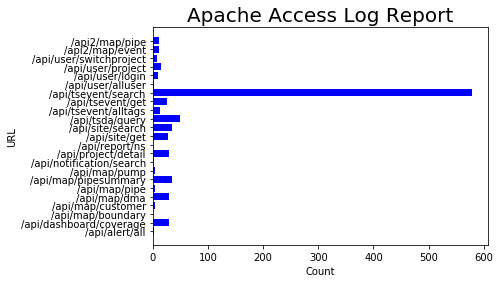

In [2]:
analyzer = apache_log_analyzer.APILogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

output = sorted(output.items(), key=lambda d: d[0])

fig=plt.figure()
subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Count')
subplt1.set_ylabel('URL')

df = pd.DataFrame(output)
subplt1.barh(df[0], df[1], color='blue')


## IP Statistics

<BarContainer object of 37 artists>

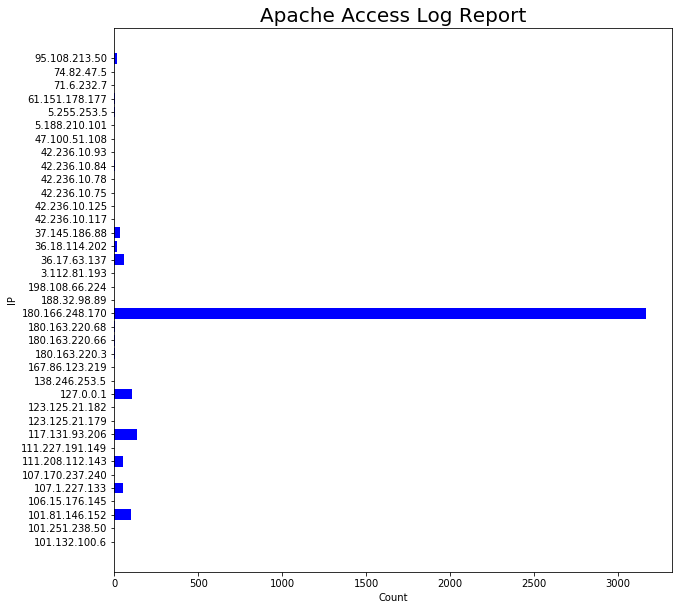

In [3]:
analyzer = log_analyzer.LogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

output = sorted(output.items(), key=lambda d: d[0])

fig=plt.figure(figsize=(10,10))
subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Count')
subplt1.set_ylabel('IP')

df = pd.DataFrame(output)
subplt1.barh(df[0], df[1], color='blue')


## Proxy Statistics

KeyError: 0

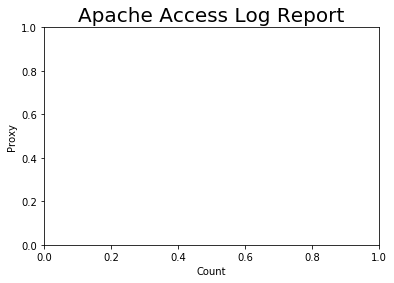

In [4]:
class ProxyLogAnalyzer(log_analyzer.LogAnalyzer):
    def process_line(self, line):
        try:
            key = re.search(re.compile("(?<=\")[^\"]*(?=\")"), line).group(0)
            key = key.split(" ")[1]
            key = key.split("?")[0]
            if 'http' in key:
                # url_comps = key.split("/")
                # key = url_comps[0]+"/"+url_comps[1]+"/"+url_comps[2]+"/"+url_comps[3]
                pass
            else:
                raise Exception("not proxy url")
        except Exception as e:
            pass
        else:
            log_analyzer.LogAnalyzer.__record__(self, key)

analyzer = ProxyLogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

output = sorted(output.items(), key=lambda d: d[0])

fig=plt.figure()
subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Count')
subplt1.set_ylabel('Proxy')

df = pd.DataFrame(output)
subplt1.barh(df[0], df[1], color='blue')


## Date Time Statistics

In [ ]:
class DateTimeLogAnalyzer(log_analyzer.LogAnalyzer):
    def process_line(self, line):
        try:
            key = re.search(re.compile("(?<=\[)[^\]]*(?=\])"), line).group(0)
            key = key.split(" ")[0]
            dt = datetime.datetime.fromtimestamp(time.mktime(time.strptime(key, '%d/%b/%Y:%H:%M:%S'))).replace(minute=0, second=0)
            # print(dt)
        except Exception as e:
            pass
        else:
            log_analyzer.LogAnalyzer.__record__(self, dt)

analyzer = DateTimeLogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

timelist = []
valuelist = []

for k, v in output.items():
    timelist.append(k)
    valuelist.append(v)
    
print(timelist)
print(valuelist)

fig=plt.figure(figsize=(15,10))

subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Date Time')
subplt1.set_ylabel('Count')
fig.autofmt_xdate()

subplt1.bar(timelist, valuelist, width=0.03, facecolor = 'lightskyblue',edgecolor = 'white')

## Time Statistics

In [ ]:
class HrLogAnalyzer(log_analyzer.LogAnalyzer):
    def process_line(self, line):
        try:
            key = re.search(re.compile("(?<=\[)[^\]]*(?=\])"), line).group(0)
            key = key.split(" ")[0]
            key = time.strptime(key, '%d/%b/%Y:%H:%M:%S').tm_hour
            # print(dt)
        except Exception as e:
            pass
        else:
            log_analyzer.LogAnalyzer.__record__(self, key)

analyzer = HrLogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

timelist = np.array([])
valuelist = np.array([])

for k, v in output.items():
    timelist = np.append(timelist, k)
    valuelist = np.append(valuelist, v)

fig=plt.figure(figsize=(15,10))

subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Hr')
subplt1.set_ylabel('Count')
# fig.autofmt_xdate()

subplt1.bar(timelist, valuelist, width=0.5, facecolor = 'lightskyblue',edgecolor = 'white')
# subplt1.bar(timelist+0.5, valuelist, width=0.5, facecolor = 'yellowgreen',edgecolor = 'white')


## Access Correlation

In [ ]:
class AllLogAnalyzer(log_analyzer.LogAnalyzer):
    def process_line(self, line):
        try:
            key = re.search(re.compile("(?<=\[)[^\]]*(?=\])"), line).group(0)
            key = key.split(" ")[0]
            key = time.strptime(key, '%d/%b/%Y:%H:%M:%S').tm_hour
            # print(dt)
        except Exception as e:
            pass
        else:
            log_analyzer.LogAnalyzer.__record__(self, key)

analyzer = AllLogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

timelist = np.array([])
valuelist = np.array([])

for k, v in output.items():
    timelist = np.append(timelist, k)
    valuelist = np.append(valuelist, v)

fig=plt.figure(figsize=(15,10))

subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Hr')
subplt1.set_ylabel('Count')
# fig.autofmt_xdate()

subplt1.bar(timelist, valuelist, width=0.5, facecolor = 'lightskyblue',edgecolor = 'white')
# subplt1.bar(timelist+0.5, valuelist, width=0.5, facecolor = 'yellowgreen',edgecolor = 'white')


class APILogAnalyzer(log_analyzer.LogAnalyzer):
    def process_line(self, line):
        try:
            if '/api/' in line:
                pass
            else:
                raise Exception('not this api')
            key = re.search(re.compile("(?<=\[)[^\]]*(?=\])"), line).group(0)
            key = key.split(" ")[0]
            key = time.strptime(key, '%d/%b/%Y:%H:%M:%S').tm_hour
            # print(dt)
        except Exception as e:
            pass
        else:
            log_analyzer.LogAnalyzer.__record__(self, key)

analyzer = APILogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

timelist = np.array([])
valuelist = np.array([])

for k, v in output.items():
    timelist = np.append(timelist, k)
    valuelist = np.append(valuelist, v)
    
subplt1.bar(timelist+0.5, valuelist, width=0.5, facecolor = 'yellowgreen',edgecolor = 'white')

## API Correlation

<BarContainer object of 6 artists>

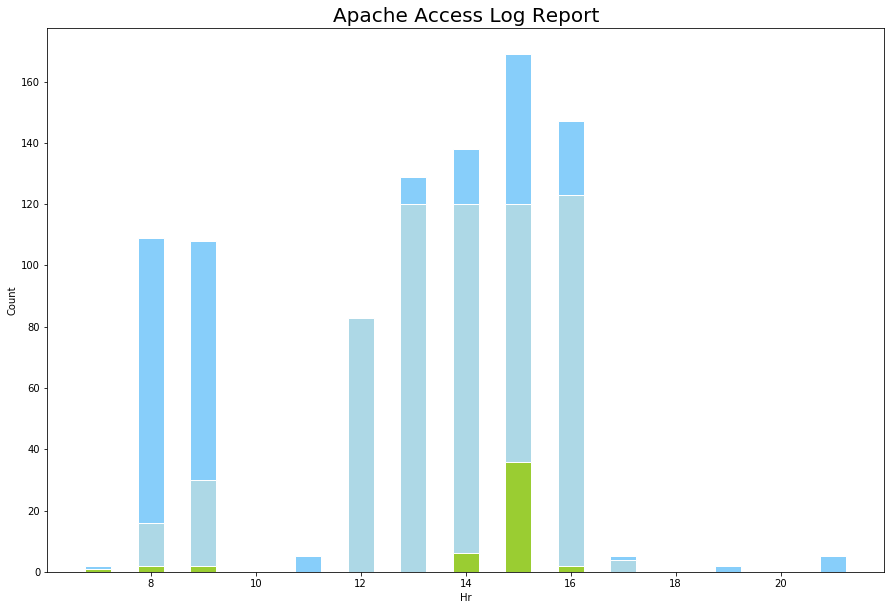

In [6]:
class AllAPIAnalyzer(log_analyzer.LogAnalyzer):
    def process_line(self, line):
        try:
            if '/api/' in line:
                pass
            else:
                raise Exception('not this api')
            key = re.search(re.compile("(?<=\[)[^\]]*(?=\])"), line).group(0)
            key = key.split(" ")[0]
            key = time.strptime(key, '%d/%b/%Y:%H:%M:%S').tm_hour
            # print(dt)
        except Exception as e:
            pass
        else:
            log_analyzer.LogAnalyzer.__record__(self, key)

analyzer = AllAPIAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

timelist = np.array([])
valuelist = np.array([])

for k, v in output.items():
    timelist = np.append(timelist, k)
    valuelist = np.append(valuelist, v)

fig=plt.figure(figsize=(15,10))

subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Hr')
subplt1.set_ylabel('Count')
# fig.autofmt_xdate()

subplt1.bar(timelist, valuelist, width=0.5, facecolor = 'lightskyblue',edgecolor = 'white')
# subplt1.bar(timelist+0.5, valuelist, width=0.5, facecolor = 'yellowgreen',edgecolor = 'white')


class API1Analyzer(log_analyzer.LogAnalyzer):
    def process_line(self, line):
        try:
            if '/api/tsevent/' in line:
                pass
            else:
                raise Exception('not this api')
            key = re.search(re.compile("(?<=\[)[^\]]*(?=\])"), line).group(0)
            key = key.split(" ")[0]
            key = time.strptime(key, '%d/%b/%Y:%H:%M:%S').tm_hour
            # print(dt)
        except Exception as e:
            pass
        else:
            log_analyzer.LogAnalyzer.__record__(self, key)

analyzer = API1Analyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

timelist = np.array([])
valuelist = np.array([])

for k, v in output.items():
    timelist = np.append(timelist, k)
    valuelist = np.append(valuelist, v)
    
subplt1.bar(timelist, valuelist, width=0.5, facecolor = 'lightblue',edgecolor = 'white')

class API2Analyzer(log_analyzer.LogAnalyzer):
    def process_line(self, line):
        try:
            if '/api/tsda/' in line:
                pass
            else:
                raise Exception('not this api')
            key = re.search(re.compile("(?<=\[)[^\]]*(?=\])"), line).group(0)
            key = key.split(" ")[0]
            key = time.strptime(key, '%d/%b/%Y:%H:%M:%S').tm_hour
            # print(dt)
        except Exception as e:
            pass
        else:
            log_analyzer.LogAnalyzer.__record__(self, key)

analyzer = API2Analyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

timelist = np.array([])
valuelist = np.array([])

for k, v in output.items():
    timelist = np.append(timelist, k)
    valuelist = np.append(valuelist, v)
    
subplt1.bar(timelist, valuelist, width=0.5, facecolor = 'yellowgreen',edgecolor = 'white')

## API Correlation 2

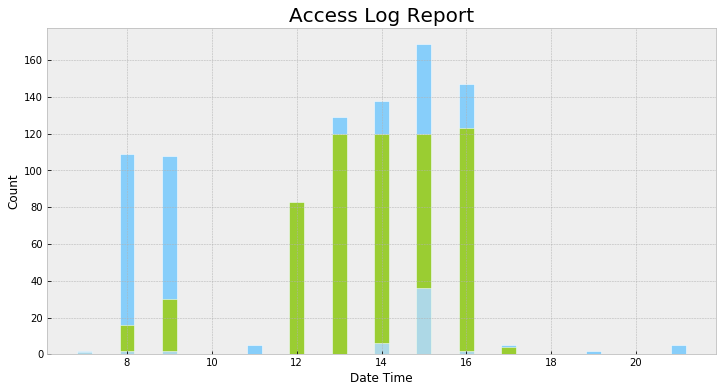

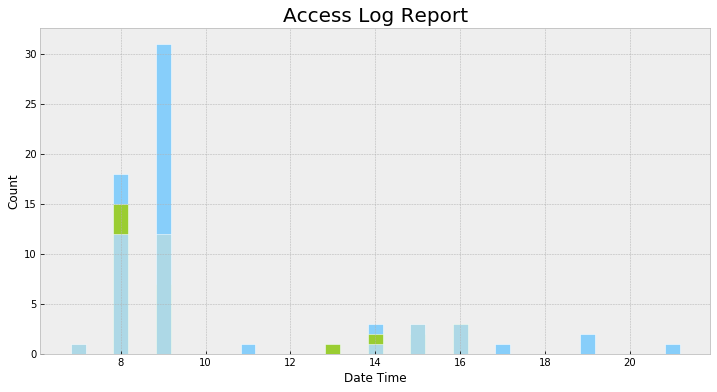

In [4]:
etl = access_log_etl.AccessLogETL('Access Log Report', 'Date Time', 'Count', ('/api/', '/api/tsevent/', '/api/tsda/'))
etl.extract('access_20190612.log')
etl.draw()

etl = access_log_etl.AccessLogETL('Access Log Report', 'Date Time', 'Count', ('/api/site', '/api/project/', '/api/user/'))
etl.extract('access_20190612.log')
etl.draw()